In [1]:
import numpy as np
import pandas as pd
from models import BondarKinematicModel, ArmstrongKinematicModel, KadaschevichKinematicModel
from matplotlib import pyplot as plt

In [2]:
experiment = pd.read_csv('placticity data/Simple_load_to_ansys.txt', names=['Strain', 'Stress'])
experiment['Stress']*=1e6

In [18]:
b_model = BondarKinematicModel(E=174000000000, 
                               mu=0.33, 
                               dt=0.06,
                               upper_yield_strength=232058967.4,
                               downer_yield_strength=302058967.4,
                               constants={'Ea': 0.001, 'Betta': 0.001, 'Sigma': 0})

In [19]:
b_model.fit(strain=experiment.Strain.values[:3000:10], 
            stress=experiment.Stress.values[:3000:10],
            initial_value=experiment.Stress.values[0])

In [14]:
b_model.constants

{'Ea': 5.1502522006868655e-05,
 'Betta': 0.004127197763532843,
 'Sigma': -0.001014498975794222}

ValueError: x and y must be the same size

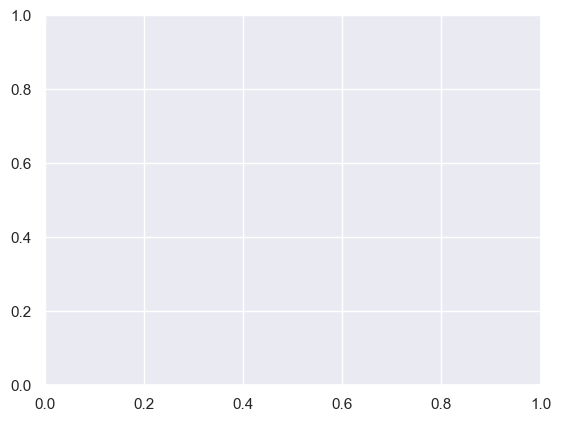

In [16]:
plt.scatter(experiment.Stress.values[:3000:10], b_model.logger.get('stress'), color=b_model.logger.get('colors'), s=0.5)

In [22]:
b_model.constants = {'Ea': 0.001215725133133707,
 'Betta': 0.02138592940160332,
 'Sigma': -0.05337641743377874}

In [9]:
b_model.constants

{'Ea': 0.001215725133133707,
 'Betta': 0.02138592940160332,
 'Sigma': -0.05337641743377874}

In [24]:
stress_predicted = b_model.predict(strain=experiment.Strain.values[:3000:10])

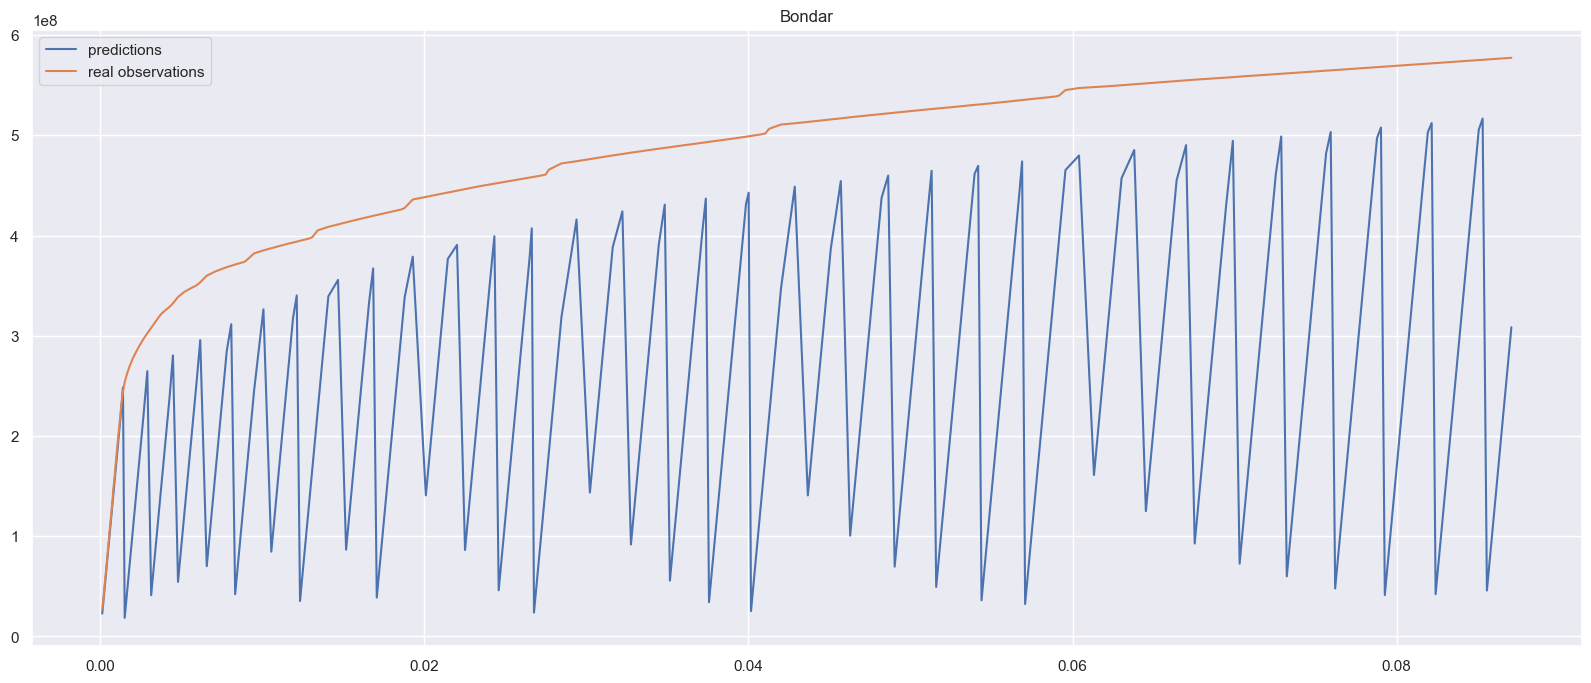

In [25]:

plt.figure(figsize=(20,8))

plt.title('Bondar')
plt.plot(experiment.Strain.values[:3000:10], stress_predicted[:3000], label='predictions')
plt.plot(experiment.Strain.values[:3000:10], experiment.Stress.values[:3000:10], label='real observations')
#plt.plot(experiment.Strain.values[:3000:10], np.array(b_model.alphas[:3000])*b_model.G, label='backstress')
#plt.plot(experiment.Strain.values[:3000:10], np.cumsum(np.array(b_model.logger.get('d_alpha')))[:3000], label='backstress')
plt.legend()

In [19]:
b_model.logger.get('plastic')

[0,
 0.000131259,
 -0.0015174440770114948,
 -0.001423167077011487,
 -0.0013684120770114873,
 -0.0013170360770114876,
 -0.001230156077011488,
 -0.0011720420770114882,
 -0.0011043570770114886,
 -0.001017424077011489,
 -0.0009616970770114895,
 -0.0009211710770114897,
 -0.0008393280770114896,
 -0.0007834920770114902,
 -0.0007194760770114902,
 -0.0006567180770114906,
 -0.0005907850770114909,
 -0.0005372970770114913,
 -0.0004776270770114918,
 -0.00042018207701149187,
 -0.00032823307701149206,
 -0.00022113307701149255,
 -8.659207701149324e-05,
 7.47849229885062e-05,
 0.00025562792298850574,
 0.0004577709229885048,
 0.0006898859229885039,
 0.0009304679229885026,
 0.0011750019229885013,
 0.0014119489229885002,
 0.0016732359229884991,
 0.002001333922988498,
 0.002324490922988496,
 0.0025502769229884953,
 0.0027554739229884943,
 0.0030684849229884923,
 0.0034715669229884918,
 0.003798058922988489,
 0.004040811922988489,
 0.004228394922988486,
 0.004439033922988485,
 0.0048419639229884855,
 0.0053

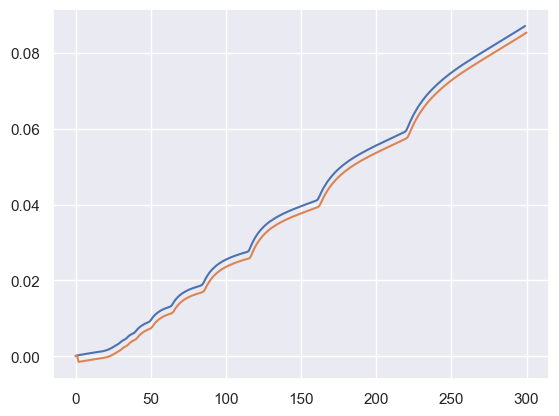

In [21]:
plt.plot(experiment.Strain.values[:3000:10])
plt.plot(b_model.logger.get('plastic'))

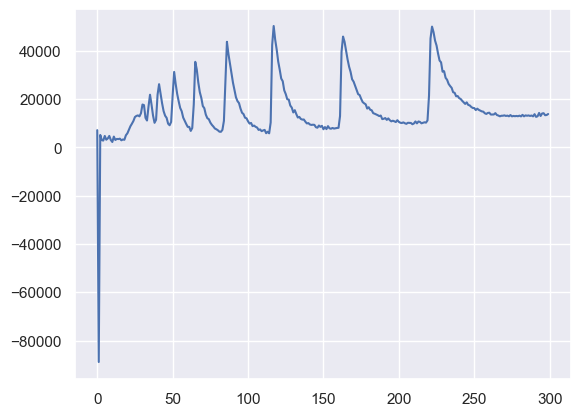

In [24]:
plt.plot(np.array(b_model.logger.get('d_alpha'))*b_model.G)

In [13]:
color_map = {0: 'b', 1:'g', 2:'r', 3:'o'}
f = lambda x: color_map[x]
colors = list(map(f, b_model.modes))

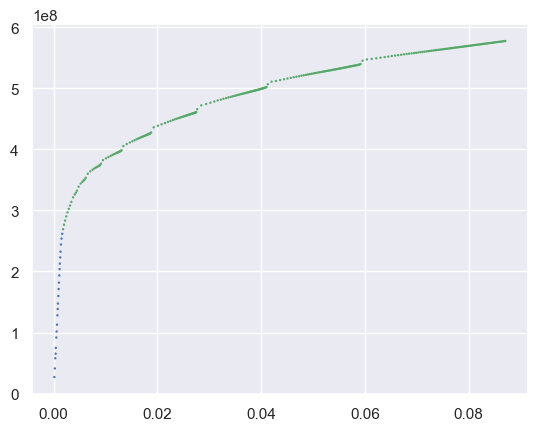

In [14]:
plt.scatter(experiment.Strain.values[:3000:10], experiment.Stress.values[:3000:10], color=colors, s=0.5)

# Другой эксперимент

In [2]:
experiment_2 = pd.read_csv('placticity data/Type_2_clear.txt', names=['Strain', 'Stress'])
experiment_2['Stress']*=1e6

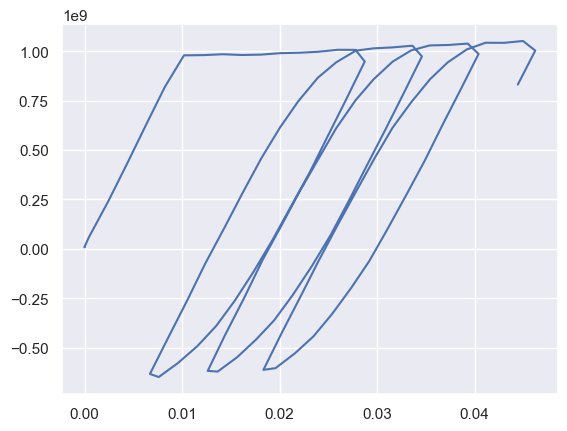

In [3]:
plt.plot(experiment_2.Strain.values[:10000:100], experiment_2.Stress.values[:10000:100])

In [3]:
#mse_s = []
#constants = []
#for 
end = 2800
uys = 960000000
dys = 200000000

In [154]:
b_model = BondarKinematicModel(E=100000000000, mu=0.33, dt=0.06, constants={'Ea': 0.053464109357680256,
 'Betta': -0.00960729221683843,
 'Sigma': 5.524325781311396})
b_model.fit(strain=experiment_2.Strain.values[:end:100], 
            stress=experiment_2.Stress.values[:end:100], 
            upper_yield_strength=uys, 
            downer_yield_strength=dys,
            initial_value=experiment_2.Stress.values[0])

In [155]:
b_model.constants

{'Ea': 0.07479648095001691,
 'Betta': -0.008526622619487235,
 'Sigma': 8.717353440372587}

In [156]:
stress_predicted = b_model.predict(strain=experiment_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

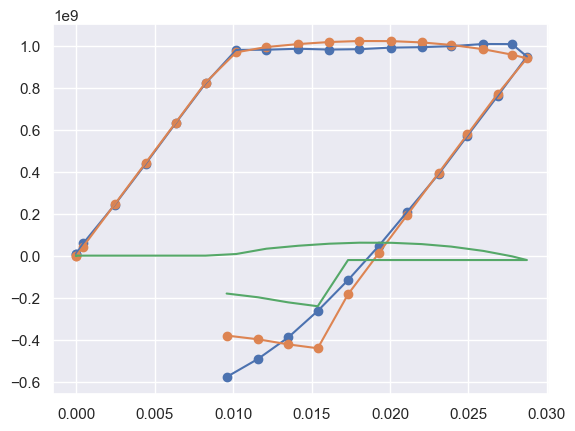

In [157]:
plt.plot(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.scatter(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.plot(experiment_2.Strain.values[:end:100], stress_predicted)
plt.scatter(experiment_2.Strain.values[:end:100], stress_predicted)
plt.plot(experiment_2.Strain.values[:end:100], np.array(b_model.alphas)*b_model.G)

In [8]:
b_model.modes

[0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 0]

In [9]:
b_model.plastic

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00291304, 0.004539  ,
       0.00630948, 0.00807342, 0.00998629, 0.01187612, 0.01375433,
       0.0158692 , 0.0178521 , 0.01901855, 0.01901855, 0.01901855,
       0.01901855, 0.01901855, 0.01901855, 0.01901855, 0.01901855,
       0.01901855, 0.01736986, 0.01516197, 0.01299765, 0.01199328,
       0.01199328])

## Попробуем Армстронга

In [4]:
a_model = ArmstrongKinematicModel(E=174000000000, mu=0.33, dt=0.06, constants={'g': 0, 'ga': 0})

In [264]:
end = 10000
uys = 960000000
dys = 200000000
a_model = ArmstrongKinematicModel(E=102000000000, mu=0.33, dt=0.06, constants={'g': +0.0002551905808593142, 'ga': -0.007347074266942275})#{'g': -0.0008367159556477285, 'ga': -1.2390163894917825})
a_model.fit(strain=experiment_2.Strain.values[:end:10], 
            stress=experiment_2.Stress.values[:end:10], 
            upper_yield_strength=uys, 
            downer_yield_strength=dys,
            initial_value=experiment_2.Stress.values[0])
#a_model.constants = {'g': -0.0008367159556477285, 'ga': -1.2390163894917825}

stress_predicted = a_model.predict(strain=experiment_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

In [260]:
end = 10000
stress_predicted = a_model.predict(strain=experiment_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

In [261]:
a_model.constants

{'g': -7.012842650453232e-05, 'ga': -0.013939329287759379}

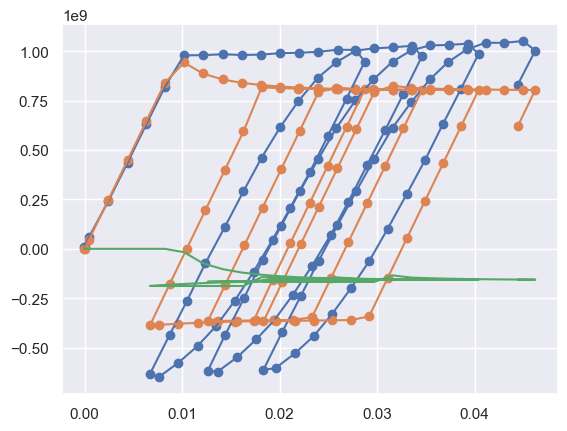

In [262]:
plt.plot(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.scatter(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.plot(experiment_2.Strain.values[:end:100], stress_predicted)
plt.scatter(experiment_2.Strain.values[:end:100], stress_predicted)
plt.plot(experiment_2.Strain.values[:end:100], np.array(a_model.alphas)*a_model.G)

In [84]:
import tqdm
from tqdm.auto import tqdm
def complex_fit(start, stop, step, every_n_point, model, initial):
    consts = initial
    for end in tqdm(range(start, stop, step)):
        mod = model(E=102000000000, mu=0.33, dt=0.06*step, constants = consts)
        mod.fit(strain=experiment_2.Strain.values[:end:every_n_point], 
            stress=experiment_2.Stress.values[:end:every_n_point], 
            upper_yield_strength=uys, 
            downer_yield_strength=dys,
            initial_value=experiment_2.Stress.values[0])
        consts = mod.constants
    return mod
    

In [38]:
a_model_fitted = complex_fit(1500, 15000, 300, 100, ArmstrongKinematicModel, {'g': 0, 'ga': 0})

  0%|          | 0/45 [00:00<?, ?it/s]

In [39]:
a_model_fitted.constants

{'g': -0.0005242623689525875, 'ga': -0.10195620697301237}

In [40]:
end = 15000
stress_predicted = a_model_fitted.predict(strain=experiment_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

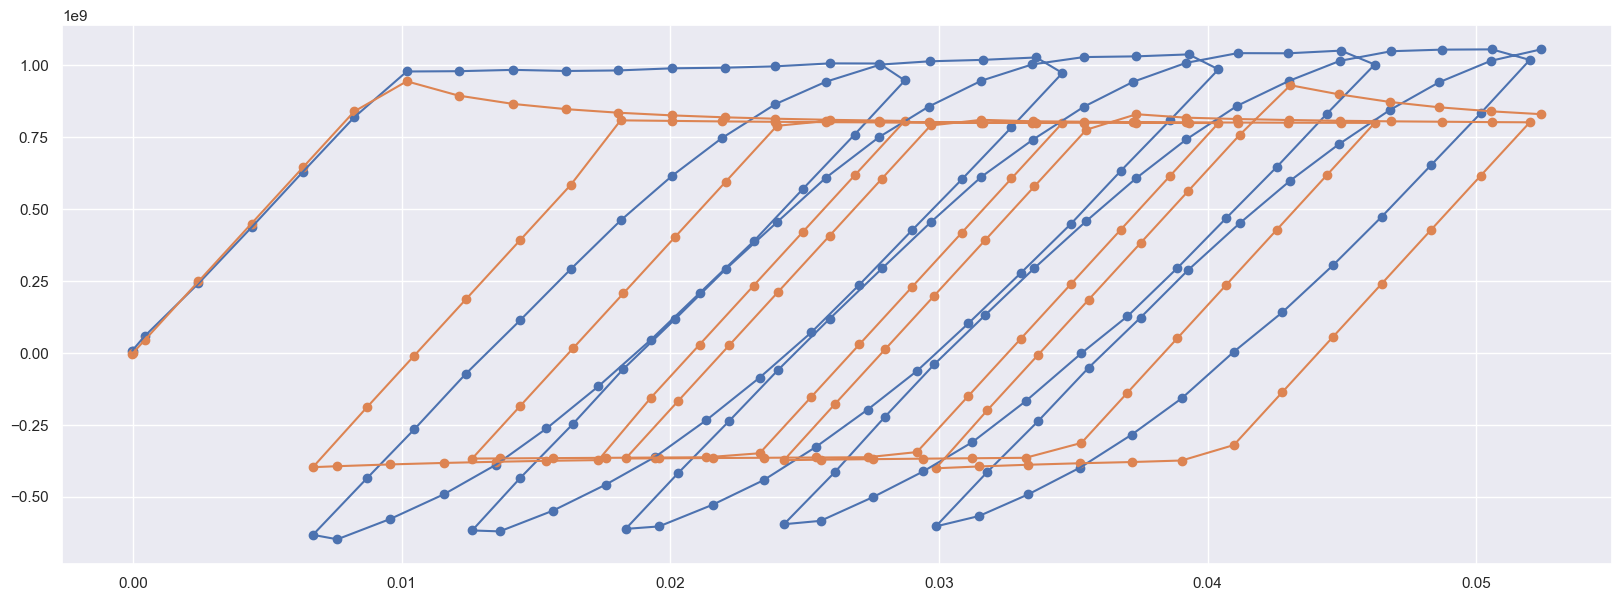

In [43]:
plt.figure(figsize=(20,7))
plt.plot(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.scatter(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.plot(experiment_2.Strain.values[:end:100], stress_predicted)
plt.scatter(experiment_2.Strain.values[:end:100], stress_predicted)
#plt.plot(experiment_2.Strain.values[:end:100], np.array(a_model_fitted.alphas)*a_model_fitted.G)

In [55]:
b_model_fitted = complex_fit(1500, 15000, 300, 100, BondarKinematicModel, {'Ea': 0.001, 'Betta': 0.04, 'Sigma': 0})

  0%|          | 0/45 [00:00<?, ?it/s]

In [50]:
b_model_fitted.constants

{'Ea': -0.00479472890004812,
 'Betta': 0.04863126488002361,
 'Sigma': 0.0979915413353975}

In [56]:
b_model_fitted.constants

{'Ea': -0.00479472876286802,
 'Betta': 0.04863126548397381,
 'Sigma': 0.09799153717292472}

In [46]:
end = 15000
stress_predicted = b_model_fitted.predict(strain=experiment_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

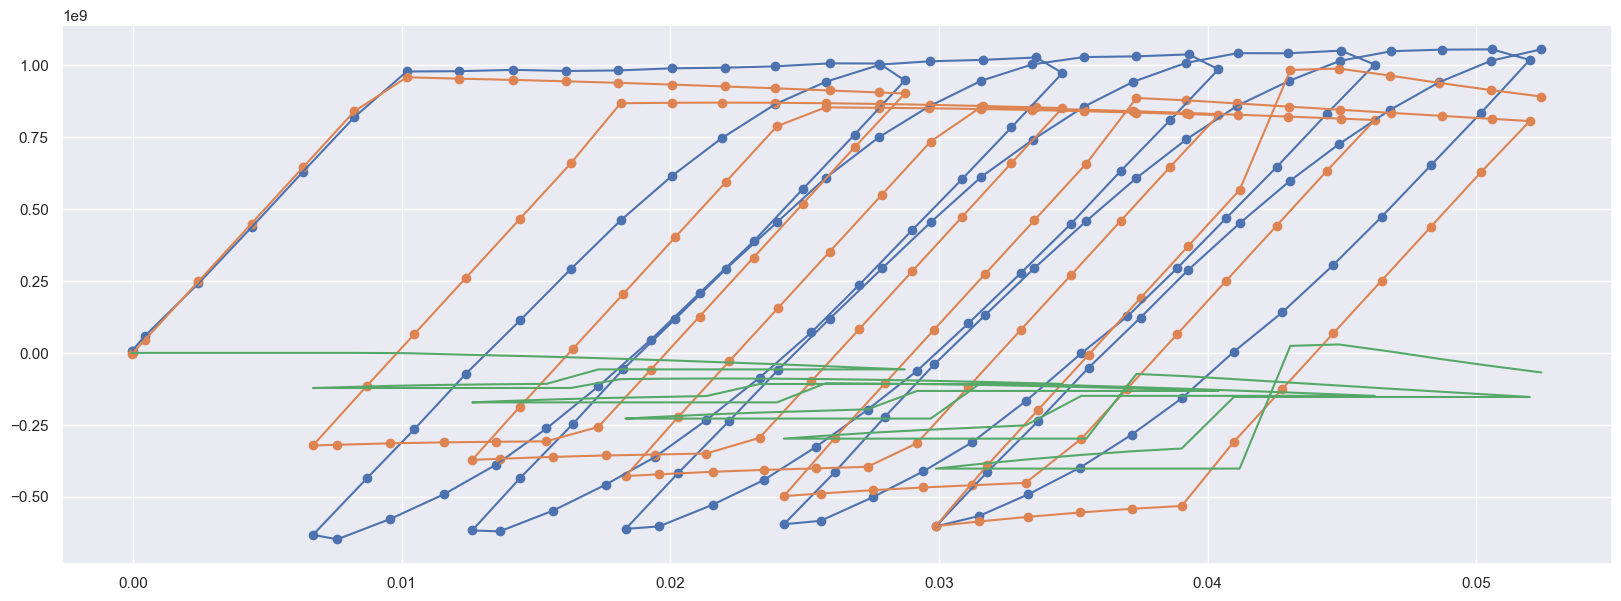

In [47]:
plt.figure(figsize=(20,7))
plt.plot(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.scatter(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.plot(experiment_2.Strain.values[:end:100], stress_predicted)
plt.scatter(experiment_2.Strain.values[:end:100], stress_predicted)
plt.plot(experiment_2.Strain.values[:end:100], np.array(b_model_fitted.alphas)*b_model_fitted.G)

In [65]:
len(experiment_2.Strain.values)

139509

In [85]:
k_model_fitted = complex_fit(1500, 130000, 300, 100, KadaschevichKinematicModel, {'g': 0})

  0%|          | 0/429 [00:00<?, ?it/s]

In [86]:
end = 130000
stress_predicted = k_model_fitted.predict(strain=experiment_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

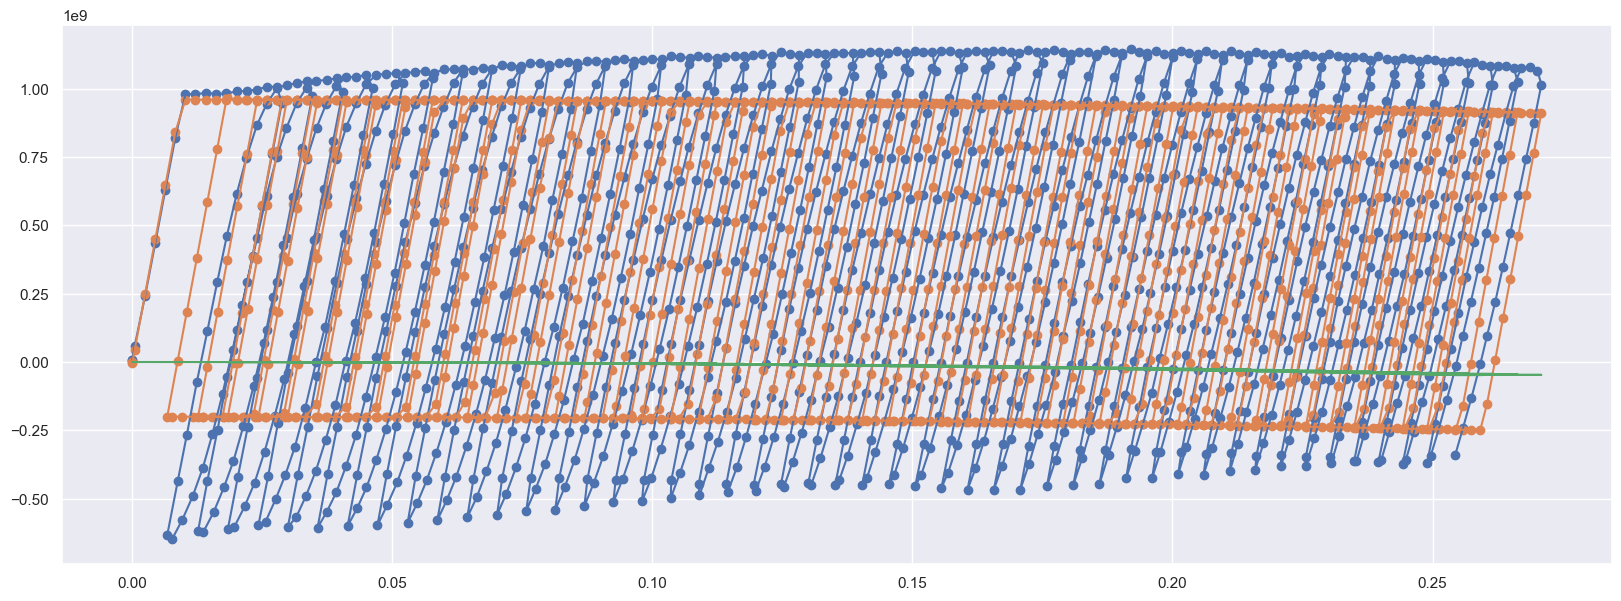

In [87]:
plt.figure(figsize=(20,7))
plt.plot(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.scatter(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.plot(experiment_2.Strain.values[:end:100], stress_predicted)
plt.scatter(experiment_2.Strain.values[:end:100], stress_predicted)
plt.plot(experiment_2.Strain.values[:end:100], np.array(k_model_fitted.alphas)*k_model_fitted.G)

In [69]:
b_model_fitted = complex_fit(1500, 130000, 300, 100, BondarKinematicModel, {'Ea': 0.001, 'Betta': 0.04, 'Sigma': 0})

  0%|          | 0/429 [00:00<?, ?it/s]

In [70]:
b_model_fitted.constants

{'Ea': -0.00023264004596636943,
 'Betta': 0.006302336396123261,
 'Sigma': 0.035319948909636495}

In [71]:
end = 130000
stress_predicted = b_model_fitted.predict(strain=experiment_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

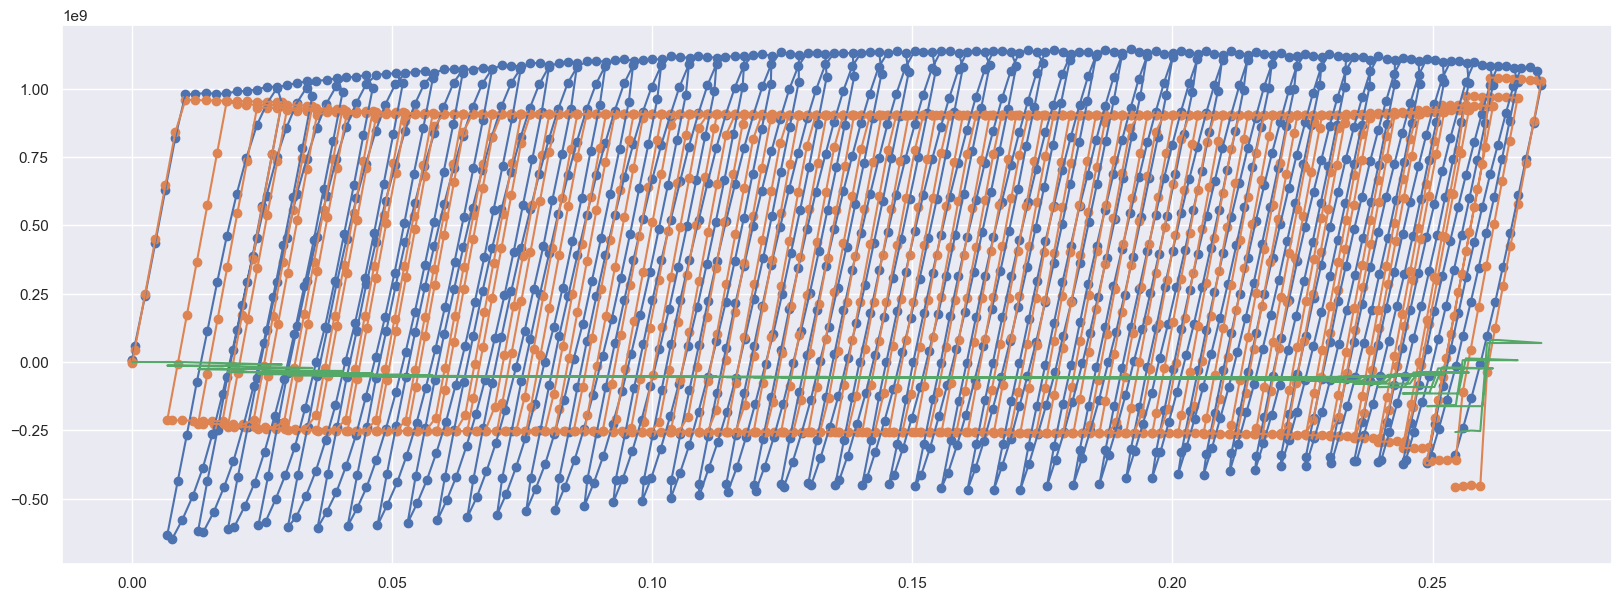

In [72]:
plt.figure(figsize=(20,7))
plt.plot(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.scatter(experiment_2.Strain.values[:end:100], experiment_2.Stress.values[:end:100])
plt.plot(experiment_2.Strain.values[:end:100], stress_predicted)
plt.scatter(experiment_2.Strain.values[:end:100], stress_predicted)
plt.plot(experiment_2.Strain.values[:end:100], np.array(b_model_fitted.alphas)*b_model_fitted.G)

In [83]:
a_model_fitted = complex_fit(1500, 90000, 500, 100, ArmstrongKinematicModel, {'g': 0.0001, 'ga': 0.000001})

  0%|          | 0/177 [00:00<?, ?it/s]

ValueError: Residuals are not finite in the initial point.

In [221]:
stress_predicted

array([ 0.00000000e+000, -2.74384080e+006,  4.41564120e+007,
        2.48464962e+008,  4.50049704e+008,  6.45956310e+008,
        8.40091278e+008,  9.37747095e+008,  9.42126836e+008,
        9.33286843e+008,  9.48723244e+008,  9.25080108e+008,
        9.67026785e+008,  9.08568507e+008,  1.00866562e+009,
        9.07968158e+008,  1.02543765e+009,  1.04893201e+009,
        8.34530060e+008,  6.38986574e+008,  4.50971708e+008,
        2.45822678e+008,  6.09931696e+007, -2.84727890e+009,
        8.44616587e+010,  9.81543675e+013,  1.27401262e+020,
        2.14819294e+032,  6.10763012e+056,  4.93709650e+105,
        6.10763012e+056,  6.10763012e+056,  6.10763012e+056,
        6.10763012e+056,  6.10763012e+056,  6.10763012e+056])

In [216]:
a_model.modes

[0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 1]

## Проверим

In [11]:
experiment_2 = pd.read_csv('placticity data/Type_2_clear.txt', names=['Strain', 'Stress'])
experiment_2['Stress']*=1e6

stress_predicted_2 = b_model.predict(strain=experiment_2.Strain.values[::100], yield_strength=302058967.4)

C:\Users\Sergei\Курсач 2023\models.py:112: RuntimeWarning: overflow encountered in double_scalars
  d_alpha = 2/3*g*strain_rate + (2/3*ge*strain + ga*alpha)*intensity
C:\Users\Sergei\Курсач 2023\models.py:112: RuntimeWarning: invalid value encountered in double_scalars
  d_alpha = 2/3*g*strain_rate + (2/3*ge*strain + ga*alpha)*intensity


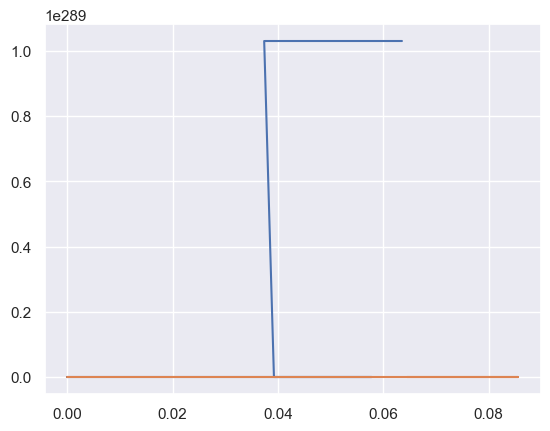

In [12]:
plt.plot(experiment_2.Strain.values[::100][:300], stress_predicted_2[:300])
plt.plot(experiment_2.Strain.values[::100][:300], experiment_2.Stress.values[:300])

## Наоборот

In [17]:
b_model = BondarKinematicModel(E=174000000000, mu=0.33, dt=0.06, constants={'Ea': 0, 'Betta': 0, 'Sigma': 0.1})

In [59]:
b_model.fit(strain=experiment_2.Strain.values[:40000:100], 
            stress=experiment_2.Stress.values[:40000:100], 
            yield_strength=900000000, 
            initial_value=experiment_2.Stress.values[0])

In [60]:
b_model.constants

{'Ea': 0.002392683144705415,
 'Betta': 0.013116827634860594,
 'Sigma': -0.008874872097120675}

In [44]:
b_model.constants

{'Ea': 0.003330749091767867,
 'Betta': 0.02405547415173292,
 'Sigma': 0.026968185144422993}

In [61]:
stress_predicted_2 = b_model.predict(strain=experiment_2.Strain.values[:30000:10], yield_strength=900000000)#302058967.4)

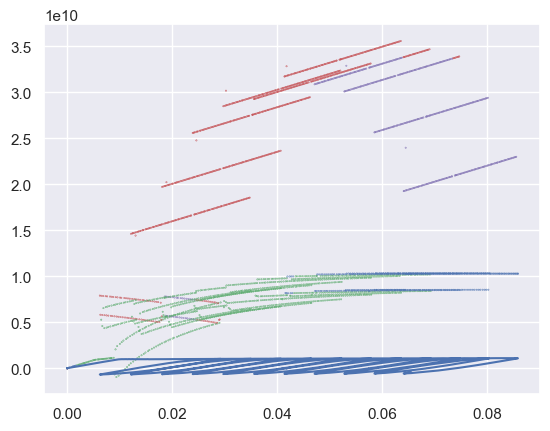

In [62]:
plt.scatter(experiment_2.Strain.values[:30000:10], stress_predicted_2, color=colors, s=0.1)
plt.plot(experiment_2.Strain.values[:30000:10], experiment_2.Stress.values[:30000:10])
#plt.plot(experiment_2.Strain.values[:30000:10], np.cumsum(np.array(b_model.d_alphas)*b_model.G)[:30000], label='backstress')
#plt.plot(experiment_2.Strain.values[:30000:10], np.cumsum(np.array(b_model.d_alphas)*b_model.G)[:30000] + 302058967.4, c='m')

In [47]:
b_model.G

65413533834.586464

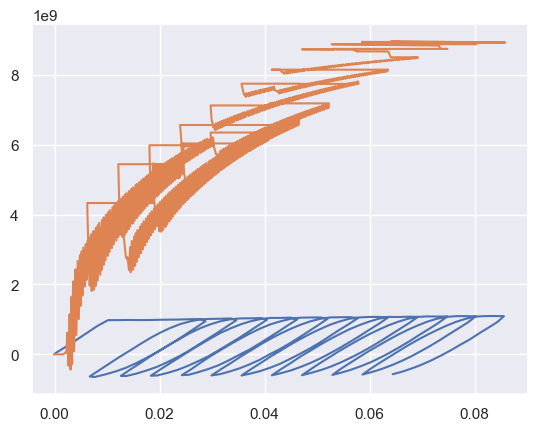

In [48]:
plt.plot(experiment_2.Strain.values[:30000:100], experiment_2.Stress.values[:30000:100])
plt.plot(experiment_2.Strain.values[:30000:10], np.cumsum(np.array(b_model.d_alphas)*b_model.G)[:30000], label='backstress')

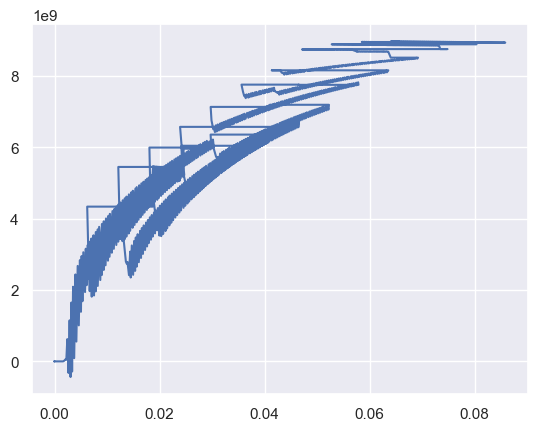

In [49]:
plt.plot(experiment_2.Strain.values[:30000:10], np.cumsum(np.array(b_model.d_alphas)*b_model.G)[:30000], label='backstress')

In [50]:
color_map = {0: 'b', 1:'g', 2:'r', 3:'m'}
f = lambda x: color_map[x]
colors = list(map(f, b_model.modes))

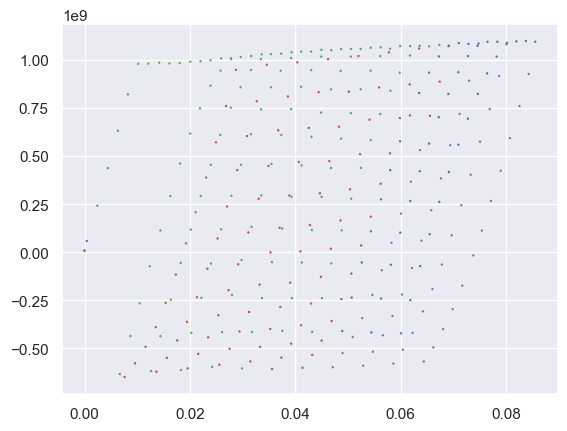

In [56]:
plt.scatter(experiment_2.Strain.values[:30000:100], experiment_2.Stress.values[:30000:100], color=colors[::10], s=0.5)

## А с Армстронгом

In [35]:
from models import ArmstrongKinematicModel
a_model = ArmstrongKinematicModel(E=174000000000, mu=0.33, dt=0.06, constants={'g': 0, 'ga': 0})

In [36]:
a_model.fit(strain=experiment.Strain.values[:3000:10], 
            stress=experiment.Stress.values[:3000:10], 
            yield_strength=302058967.4, 
            initial_value=experiment.Stress.values[0])

C:\Users\Sergei\Курсач 2023\uniaxial.py:198: RuntimeWarning: overflow encountered in double_scalars
  sigma_pred = (alpha + d_alpha)*self.G - yield_strengt
C:\Users\Sergei\Курсач 2023\models.py:85: RuntimeWarning: invalid value encountered in double_scalars
  d_alpha = 2/3*self.constants['g']*strain_rate + self.constants['ga']*alpha*intensity
C:\Users\Sergei\Курсач 2023\uniaxial.py:196: RuntimeWarning: overflow encountered in double_scalars
  sigma_pred = (alpha + d_alpha)*self.G + yield_strengt


In [37]:
a_model.constants

{'g': 6.148512427698539e-05, 'ga': -0.01154394923890043}

In [38]:
stress_predicted_3 = a_model.predict(strain=experiment_2.Strain.values[:30000:10], yield_strength=302058967.4)

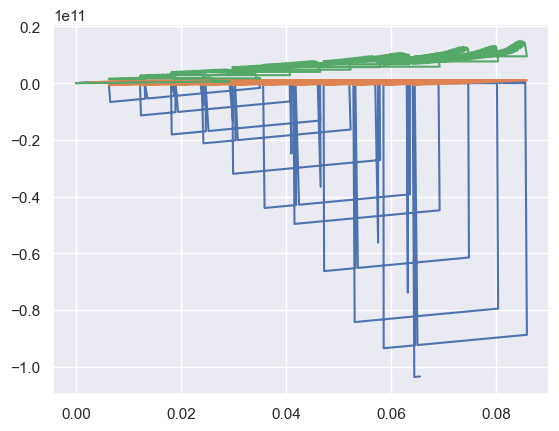

In [39]:
plt.plot(experiment_2.Strain.values[:30000:10], stress_predicted_3)
plt.plot(experiment_2.Strain.values[:30000:10], experiment_2.Stress.values[:30000:10])
plt.plot(experiment_2.Strain.values[:30000:10], np.cumsum(np.array(b_model.d_alphas)*b_model.G)[:30000], label='backstress')